# Analysis Notebook
- Here we load the pickle files of both runs and analyze them

In [25]:
import pickle
import os
import matplotlib.pyplot as plt

first_run_dir = "./pickle_objects"
second_run_dir = "./pickle_objects_2"

# Load objects from first run
first_run_objects = []
for file in os.listdir(first_run_dir):
    with open(f"{first_run_dir}/{file}", "rb") as f:
        first_run_objects.append(pickle.load(f))

# Load objects from second run
second_run_objects = []
for file in os.listdir(second_run_dir):
    with open(f"{second_run_dir}/{file}", "rb") as f:
        second_run_objects.append(pickle.load(f))

## Plot the loaded objects as a pareto front
    

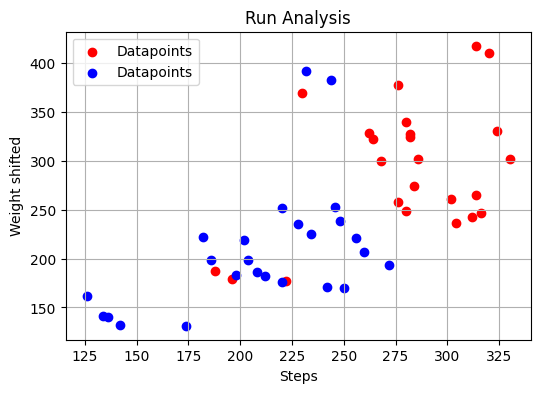

In [26]:
step_values = []
weight_values = []
for pf in first_run_objects:
    step_values.extend(pf["Steps"])
    weight_values.extend(pf["Shifted_Weight"])

second_step_values = []
second_weight_values = []
for pf in second_run_objects:
    second_step_values.extend(pf["Steps"])
    second_weight_values.extend(pf["Shifted_Weight"])

plt.figure(figsize=(6,4))
plt.scatter(step_values, weight_values, color="red", label="Datapoints")
plt.scatter(second_step_values, second_weight_values, color="blue", label="Datapoints")
plt.title("Run Analysis")
plt.xlabel("Steps")
plt.ylabel("Weight shifted")
plt.legend()
plt.grid(True)
plt.show()
